# Key Levels mix clustering

In [24]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
from sklearn.cluster import KMeans
import pickle

In [25]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/VN30ps/clusters/v2/VN30F1M_5m_data_train.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = []
dataset

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11,cluster
Date,,,,,,,,,,,,,,,,,
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329,-0.5,0.5,0.0,-0.7,0.8,-0.7,0.1,-0.7,0.2,-0.6,-0.6,185
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722,-0.9,0.4,-0.8,-1.4,-0.4,-0.9,-0.9,-1.6,-0.1,-1.6,-0.8,6
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939,-0.4,1.7,-0.3,-1.3,0.0,-1.2,-0.4,-1.8,-0.8,-1.3,-1.3,6
2020-11-02 09:25:00,898.3,898.6,897.8,898.5,1607,-0.1,0.7,0.2,-0.1,2.0,0.0,0.3,-1.0,0.3,-0.9,-0.1,98
2020-11-02 09:30:00,898.5,899.4,898.3,899.0,1623,-0.4,0.7,0.5,0.4,1.2,0.7,0.5,0.4,2.5,0.5,0.8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 14:15:00,1229.9,1230.5,1227.3,1229.4,7567,-1.1,2.1,-0.5,-2.0,3.3,3.0,-0.4,-1.1,2.2,-1.1,2.2,131
2024-04-26 14:20:00,1229.8,1235.9,1229.4,1232.4,15934,-3.5,3.0,2.6,1.9,5.1,2.5,3.0,1.0,6.3,6.0,2.6,116
2024-04-26 14:25:00,1232.5,1236.5,1232.1,1232.1,13075,-4.4,0.0,-0.4,-3.8,2.7,2.3,-0.3,1.6,4.8,2.2,2.7,92


In [26]:
data = dataset.copy()
back_bar = 10
next_bar = back_bar -1
data['max_prev'] = data['High'].rolling(back_bar).max()
data['max_next'] = data['High'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Low'].rolling(back_bar).min()
data['min_next'] = data['Low'].shift(-next_bar).rolling(back_bar).min()
data["RSI"] = ta.rsi(data["Close"], length=14)
data

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,input_8,input_9,input_10,input_11,cluster,max_prev,max_next,min_prev,min_next,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329,-0.5,0.5,0.0,-0.7,0.8,...,-0.7,0.2,-0.6,-0.6,185,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722,-0.9,0.4,-0.8,-1.4,-0.4,...,-1.6,-0.1,-1.6,-0.8,6,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939,-0.4,1.7,-0.3,-1.3,0.0,...,-1.8,-0.8,-1.3,-1.3,6,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:25:00,898.3,898.6,897.8,898.5,1607,-0.1,0.7,0.2,-0.1,2.0,...,-1.0,0.3,-0.9,-0.1,98,NaN,NaN,NaN,NaN,NaN
2020-11-02 09:30:00,898.5,899.4,898.3,899.0,1623,-0.4,0.7,0.5,0.4,1.2,...,0.4,2.5,0.5,0.8,28,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 14:15:00,1229.9,1230.5,1227.3,1229.4,7567,-1.1,2.1,-0.5,-2.0,3.3,...,-1.1,2.2,-1.1,2.2,131,1232.8,NaN,1225.1,NaN,48.767244
2024-04-26 14:20:00,1229.8,1235.9,1229.4,1232.4,15934,-3.5,3.0,2.6,1.9,5.1,...,1.0,6.3,6.0,2.6,116,1235.9,NaN,1225.1,NaN,55.098622
2024-04-26 14:25:00,1232.5,1236.5,1232.1,1232.1,13075,-4.4,0.0,-0.4,-3.8,2.7,...,1.6,4.8,2.2,2.7,92,1236.5,NaN,1226.1,NaN,54.374963


In [27]:
data.dropna(inplace=True)
data['is_r_keylevel'] = data.apply(lambda r: True if (r['High'] == r['max_prev'] and r['High'] == r['max_next']) else False, axis=1)
data['is_s_keylevel'] = data.apply(lambda r: True if (r['Low'] == r['min_prev'] and r['Low'] == r['min_next']) else False, axis=1)
data['next_cluster'] = data['cluster'].shift(-1)
data

,Open,High,Low,Close,Volume,input_1,input_2,input_3,input_4,input_5,...,input_11,cluster,max_prev,max_next,min_prev,min_next,RSI,is_r_keylevel,is_s_keylevel,next_cluster
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 10:20:00,901.1,901.2,899.3,899.3,1796,-1.9,0.0,-1.8,-2.2,-0.3,...,-0.4,81,901.5,901.2,897.7,895.4,48.782768,False,False,100.0
2020-11-02 10:25:00,899.1,900.3,898.8,899.9,1917,-0.4,1.1,0.8,-1.3,0.6,...,-1.3,100,901.5,900.4,897.7,895.4,52.422074,False,False,98.0
2020-11-02 10:30:00,900.0,900.1,899.3,900.0,1150,-0.1,0.7,0.0,-0.3,1.2,...,0.7,98,901.5,900.4,897.7,895.4,53.021227,False,False,54.0
2020-11-02 10:35:00,899.6,900.4,899.1,899.4,1106,-1.0,0.3,-0.2,-0.7,0.1,...,-0.5,54,901.5,900.4,898.1,895.4,49.031500,False,False,185.0
2020-11-02 10:40:00,899.2,899.4,898.8,899.4,1652,0.0,0.6,0.2,-1.0,0.3,...,-0.6,185,901.5,900.2,898.6,895.4,49.031500,False,False,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 13:30:00,1231.3,1232.8,1228.1,1228.1,10045,-4.7,0.0,-3.2,-3.8,-0.4,...,-0.5,162,1234.0,1232.8,1226.5,1225.1,42.979015,False,False,137.0
2024-04-26 13:35:00,1228.0,1228.8,1225.1,1228.5,11359,-0.3,3.4,0.5,-4.3,0.4,...,-2.8,137,1232.8,1235.9,1225.1,1225.1,44.133669,False,True,77.0
2024-04-26 13:40:00,1229.1,1230.2,1228.6,1229.0,5461,-1.2,0.4,-0.1,0.2,3.9,...,0.9,77,1232.8,1236.5,1225.1,1226.1,45.616125,False,False,162.0


In [ ]:
unique_labels = list(set(label))

In [28]:
supply_data = data[data['is_r_keylevel'] == True]
demand_data = data[data['is_s_keylevel'] == True]
normal_data = data[(data['is_r_keylevel'] != True) & (data['is_s_keylevel'] != True)]

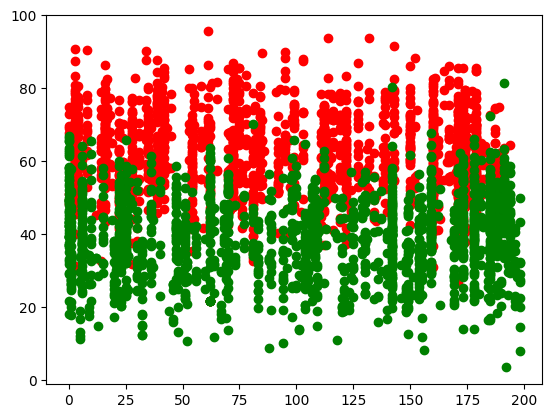

In [29]:
plt.scatter(supply_data['cluster'], supply_data['RSI'], c='red')
plt.scatter(demand_data['cluster'], demand_data['RSI'], c='green')
# plt.scatter(normal_data['cluster'], normal_data['RSI'], c='yellow')

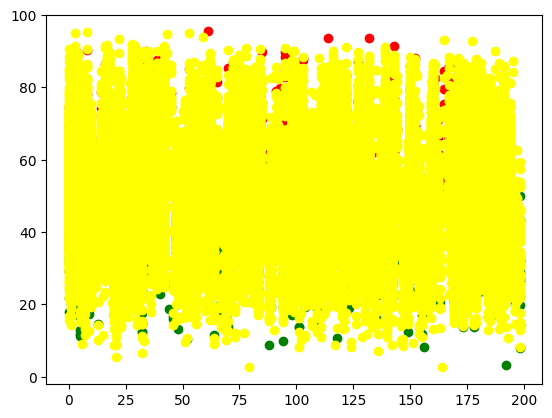

In [30]:
plt.scatter(supply_data['cluster'], supply_data['RSI'], c='red')
plt.scatter(demand_data['cluster'], demand_data['RSI'], c='green')
plt.scatter(normal_data['cluster'], normal_data['RSI'], c='yellow')

In [31]:
#Short
grouped_a = supply_data[['cluster']].groupby([supply_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_a['count'].sort_values(ascending=False).tail(99).index

Index([ 39,  81,  22,  35,  42,  84,   4,  99,  75,  62,  92, 127,  14, 139,
       119, 143, 167, 173,  61, 189,   8,  95, 111,  70,  78,  31, 103, 115,
       162, 116, 114, 188, 138,  58,  76, 170,  34, 132,   0,  85,  55,  17,
        24, 187,  82,  71, 177, 134, 152,   2, 181, 113,  53, 131, 175,  41,
       165,  30, 182,  65,  19,  18,  45,  36, 191,  97,  43, 124, 141,  27,
        91, 169, 183, 185,  98, 153, 135,   6,  63,  26,  12, 190,  29,  59,
       178,  86, 176,  74,  80, 144,  93, 168,  96, 166, 163, 102, 161, 140,
       194],
      dtype='int64', name='cluster')

In [32]:
#Long
grouped_b = demand_data[['cluster']].groupby([demand_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_b['count'].sort_values(ascending=False).tail(99).index

Index([ 47, 194, 188, 130, 104, 149, 169,  36, 107, 108, 109,  94, 155,  83,
        10,  22,  98, 125,  20,  32,  89,  30,  15, 148, 171,  81, 100,  88,
       196, 120, 181, 198,  68, 140, 190, 105,  56, 134,  48,  64, 184,   5,
       129, 112,  67, 121,  69,  52,  40,  46,  73,   9, 136,  77, 124,  27,
        26, 110,  21, 102, 180, 150, 123, 137, 189, 193,  60, 101,  96, 187,
        28,  13,  12,  97,   7, 172, 170, 146, 163, 162,  54, 119, 118, 117,
       113, 151,  37,  33, 182,  44,  61,  19,  99, 131, 192, 156,  55, 197,
       168],
      dtype='int64', name='cluster')

In [33]:
#None
grouped_c = normal_data[['cluster']].groupby([normal_data.cluster]).count().rename(columns={'cluster': 'count'})
grouped_c['count'].sort_values(ascending=False).count()

195

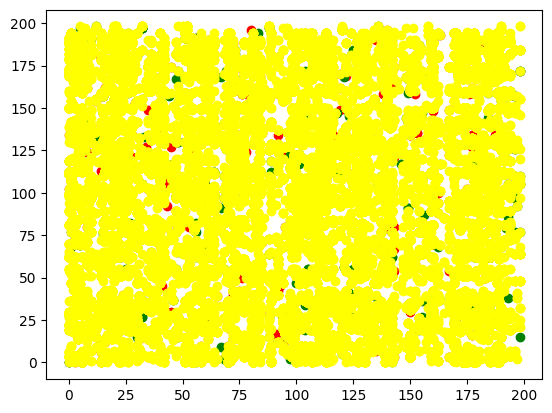

In [36]:
plt.scatter(supply_data['cluster'], supply_data['next_cluster'], c='red')
plt.scatter(demand_data['cluster'], demand_data['next_cluster'], c='green')
plt.scatter(normal_data['cluster'], normal_data['next_cluster'], c='yellow')

In [40]:
data_y = data[data.cluster == 54]
data_y[["input_1", "input_2", "input_3", "input_4",
                    "input_5", "input_6", "input_7", "input_8",
                    "input_9", "input_10", "input_11"]]

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11
Date,,,,,,,,,,,
2020-11-02 10:35:00,-1.0,0.3,-0.2,-0.7,0.1,-0.6,-0.6,-0.9,0.6,0.3,-0.5
2020-11-02 13:40:00,-1.5,0.7,-1.5,-1.8,-0.3,-0.6,-1.4,-0.7,1.1,1.1,-0.6
2020-11-02 14:00:00,-0.9,0.3,-0.3,-1.4,0.4,-1.0,-0.5,-1.5,1.1,1.1,-1.0
2020-11-03 13:35:00,-0.7,0.4,-0.6,-1.4,-0.6,-1.0,-0.7,-1.0,0.7,0.1,-1.0
2020-11-04 10:25:00,-0.6,0.1,-0.4,-1.2,-0.4,-1.2,-0.5,-0.9,0.8,0.4,-0.9
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15 13:30:00,-0.6,0.7,-0.6,-1.1,0.3,0.1,-0.5,-0.5,0.9,0.7,0.0
2024-04-17 11:20:00,-0.9,0.3,0.0,-1.0,0.6,-0.1,-0.9,-0.8,0.9,0.3,-0.2
2024-04-19 10:30:00,-1.9,0.6,-0.9,-1.4,1.6,-0.7,-0.9,-1.1,0.7,0.4,-0.6


In [41]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=11)
pca.fit(data[["input_1", "input_2", "input_3", "input_4",
                    "input_5", "input_6", "input_7", "input_8",
                    "input_9", "input_10", "input_11"]]) 
X = pca.transform(data[["input_1", "input_2", "input_3", "input_4",
                    "input_5", "input_6", "input_7", "input_8",
                    "input_9", "input_10", "input_11"]])

In [42]:
X

array([[ 2.17308799e+00, -2.50875056e+00, -4.98458444e-01, ...,
         1.19399852e-02, -2.98509247e-01,  2.32224597e-01],
       [ 1.20102763e+00,  6.07703562e-01, -7.05225899e-01, ...,
         1.55003553e-01,  6.36045735e-02,  8.50085003e-03],
       [-2.24375857e-01,  1.04612499e+00, -1.03053925e+00, ...,
        -2.85208199e-01,  1.78041044e-01,  6.52722699e-02],
       ...,
       [ 2.94422896e-01,  3.21971312e+00,  1.18870257e+00, ...,
        -2.88904767e-03,  2.51980075e-01, -1.21424616e+00],
       [ 2.44708499e+00, -3.32753156e+00,  1.87859997e+00, ...,
         7.99180869e-01, -9.52267421e-01,  6.28404298e-01],
       [ 6.91907681e+00, -2.93505810e-01,  1.08776907e+00, ...,
         5.95895608e-01,  7.20341889e-01,  5.20129528e-01]])